In [4]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D

In [5]:
df = pd.read_csv("mnsol_dataset.csv")
df

,name,smiles
0,n-pentane,CCCCC
1,n-octane,CCCCCCCC
2,benzene,c1ccccc1
3,naphthalene,c1ccc2ccccc2c1
4,water,O
5,methanol,CO
6,o-cresol,Cc1ccccc1O
7,aceticacid,CC(O)=O
8,1_4-dioxane,C1COCCO1
9,methylpentanoate,CCCCC(=O)OC


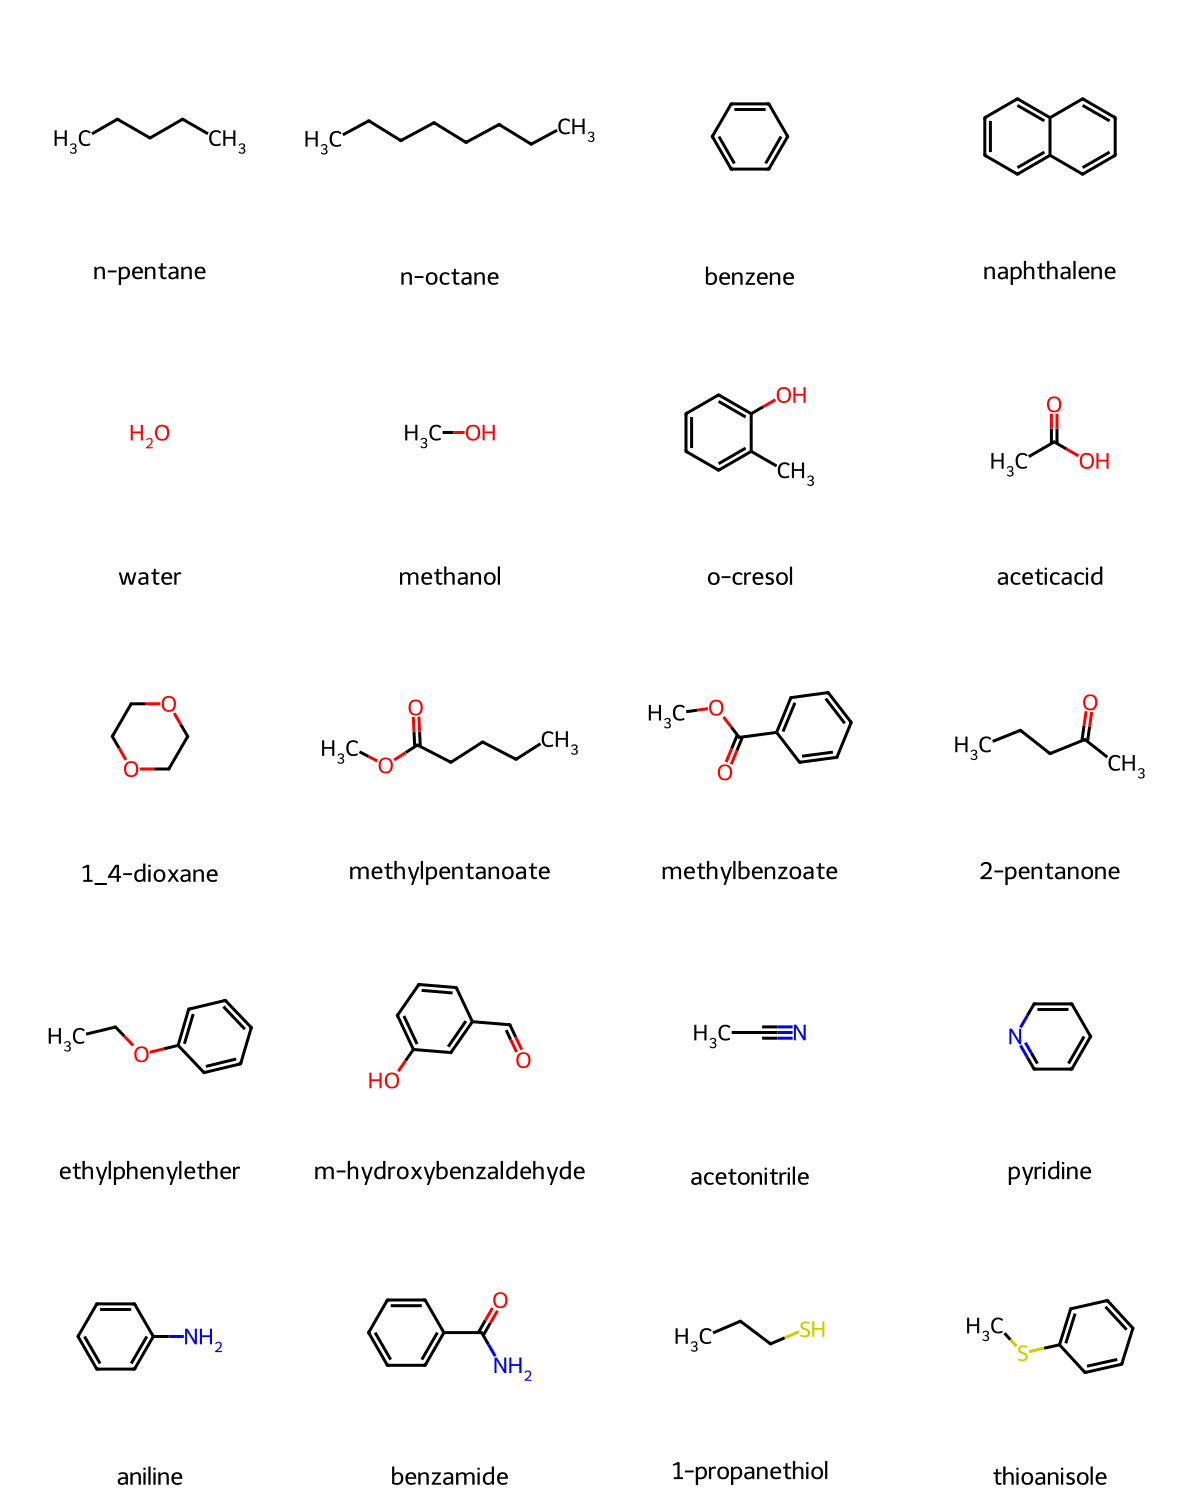

In [6]:
smiles_list = df["smiles"].tolist()
names_list = df["name"].tolist()

molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
draw_options = rdMolDraw2D.MolDrawOptions()
draw_options.explicitMethyl = True
draw_options.bondLineWidth = 3
draw_options.fixedFontSize = 22
draw_options.legendFontSize = 24

svg = Draw.MolsToGridImage(
    molecules,
    molsPerRow=4,
    subImgSize=(300, 300),
    legends=names_list,
    useSVG=True,
    drawOptions=draw_options,
)

with open("molecules_grid.svg", "w") as f:
    f.write(svg.data)

svg